[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/amackay/hons_proj/blob/main/example_live_update_chart.ipynb)



This notebook contains a (relatively) simple example showing how to update charts while a neural net is still training.


In [1]:

import matplotlib.pyplot as plt
import IPython

import torch
import torch.nn as nn


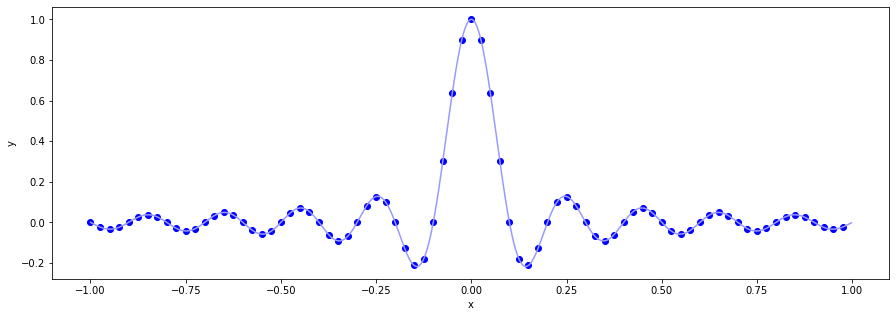

In [2]:

# create a function and take samples

x_min = -1
x_max = 1
func = lambda x: torch.sinc(10*x)

# for training
sample_count = 80
train_xs = torch.arange(start=x_min, end=x_max, step=(x_max-x_min)/sample_count)
train_ys = func(train_xs)

# for plotting
plot_sample_count = 1000
plot_xs = torch.arange(start=x_min, end=x_max, step=(x_max-x_min)/plot_sample_count)
plot_ys = func(plot_xs)


fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,5)
ax.plot(plot_xs, plot_ys, c='#99f')
ax.scatter(train_xs, train_ys, c='#00f')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.show()


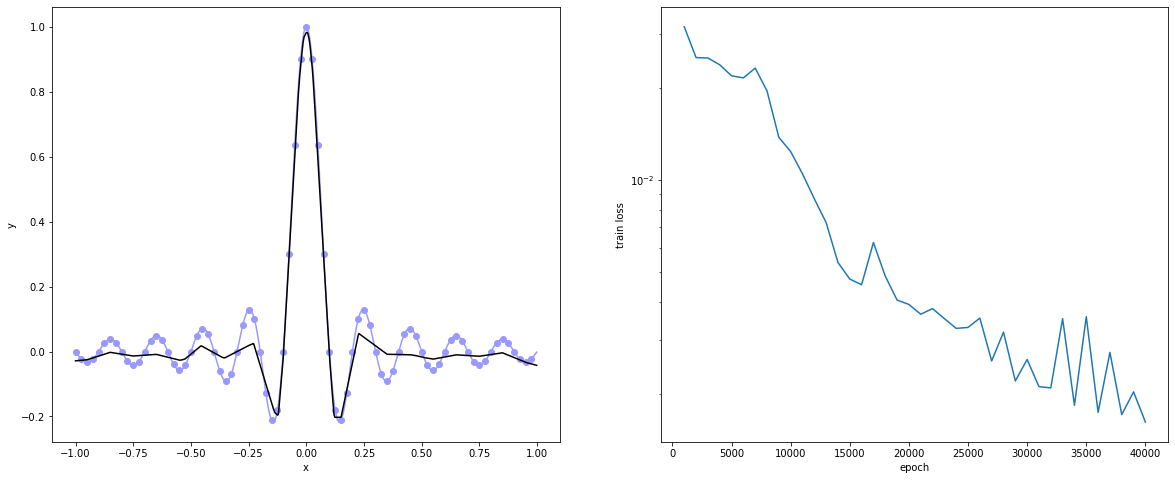

In [3]:


# setup

net = nn.Sequential(
    nn.Linear(1,200),
    nn.ReLU(),
    nn.Linear(200,200),
    nn.ReLU(),
    nn.Linear(200,1),
)
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)
criterion = nn.MSELoss()

epoch = 0
epoch_list = []
loss_list = []

# set up charts once, and reuse them
# without this, there will be multiple charts displayed after execution finishes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax_func = axes[0]
ax_loss = axes[1]
# use IPython to display the figure, and store the "display" in a variable
charts_display = IPython.display.display(fig, display_id=True)


# training

try:

  while epoch < 100000:
    optimizer.zero_grad()
    loss = criterion(net(train_xs.unsqueeze(1)), train_ys.unsqueeze(1))
    loss.backward()
    optimizer.step()    
    epoch += 1

    if epoch % 1000 == 0:  # limits rate of plotting   

      epoch_list.append(epoch)
      loss_list.append(loss.item())
      with torch.no_grad():
        output_ys = net(plot_xs.unsqueeze(1)).squeeze()
      
      # instead of creating new plots, we clear and reuse the same ones
      ax_func.clear()
      ax_func.set_xlabel("x")
      ax_func.set_ylabel("y")
      ax_func.plot(plot_xs, plot_ys, c='#99f')
      ax_func.scatter(train_xs, train_ys, c='#99f')
      ax_func.plot(plot_xs, output_ys, c='black')

      ax_loss.clear()
      ax_loss.set_xlabel("epoch")
      ax_loss.set_ylabel("train loss")
      ax_loss.set_yscale('log')
      ax_loss.plot(epoch_list, loss_list)

      charts_display.update(fig)  # update the existing chart display

    
except KeyboardInterrupt:
  # try-except allows execution to be cancelled without throwing errors
  pass


plt.close()  # this prevents a duplicate chart after stopping

